```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [1]:
#GPU
import torch
import matplotlib.pyplot as plt
import torchvision

# Diagram

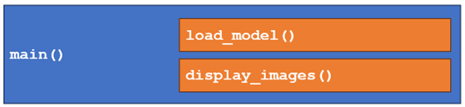

# Code

In [2]:
def load_model(use_gpu=True):
    model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                           'DCGAN',
                           pretrained=True,
                           useGPU=use_gpu)
    return model

In [3]:
def display_images(images):
    images = (images - images.min()) / (images.max() - images.min()) # Used for normalizing the image.

    grid_image = torchvision.utils.make_grid(images).permute(1, 2, 0).cpu().numpy()
    plt.imshow(grid_image)
    plt.axis('off')
    plt.show()

In [4]:
def main():
    TOTAL_IMAGES = 8

    use_gpu = torch.cuda.is_available()

    model = load_model(use_gpu=use_gpu)

    noise, _ = model.buildNoiseData(TOTAL_IMAGES)

    with torch.no_grad():
        images = model.test(noise)

    display_images(images)

# Execution

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/DCGAN_fashionGen-1d67302.pth" to /root/.cache/torch/hub/checkpoints/DCGAN_fashionGen-1d67302.pth
100%|██████████| 39.7M/39.7M [00:02<00:00, 16.2MB/s]


Average network found !


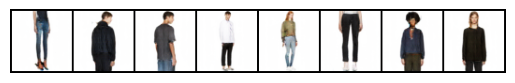

In [5]:
main()